# Testing a significance of the correlation between a suicide rate and a number of psychiatrists and psychologists working in the mental health sector.

## Introduction

The subject of the actual analysis is to test if there is a significant correlation between the suicide rate across the world and a number of psychiatrists and psychologists working in the mental health sector. 

Mental health issues are becoming a serious problem nowadays and there is a lot of discussion, especially in the Europe and USA, on what can be done in terms of a prevention, as well, as a treatment. It makes a logical sense to assume that the number of workers in the mental health sector should be correlated with the suicide rate either because of an availability or, a potential time in which one can start receiving appropriate help.

## Research & Hypothesis

The questions that the analysis will try to answer: is there a significant relationship between the suicide rate across the world and the number of human resources (psychiatrists and psychologists) working in the mental health sector. Suicide rate is a dependent variable and the number of HR in mental health sector is an independent variable. I can assume that there should be a negative correlation between these coefficients as the availability of mental health specialists should lead to decreasing number of people who decide to commit a suicide. At the same time I am not ruling out that there can be an inverted correlation and the number of the HR in the mental health sector can increase in the countries where there is an increasing demand for mental health care; ergo there are more people with issues related to a mental health.

• The analysis will be applied with inferential statistics    
• The sample was collected from the data provided by the Global Health Organization   
• The sample size is 79 (N=79)    
• The suicide rate is an age-standardized rate of committed suicides per 100 000 population    
• The HR rate is an average rate of human resources (psychiatrists + psychologists) per 100 000 population    

**The null hypothesis states that there is no statistical significance between the suicide rate and the number of HR in the mental health sector.** 

*H(0): &#x03C1;=0*

**The alternative hypothesis states that there is a statistically significant correlation between the suicide rate and the number of HR in the mental health sector.** 

*H(A): &#x03C1; > 0 or &#x03C1; < 0 or &#x03C1; ≠ 0*

**The level of a confidence interval alpha is set at 95%. α = 0.05 for a two-tailed test.**

## Experimental design

The analysis will use the **correlation coefficient - Pearson's r** to measure if there is a statistically significant relationship between variables and the two-tailed **p-value** to indicate the probability of null hypothesis being true, whereas the analysis is based on the sample data we will take a sampling error into account by calculating a **95% confidence interval** (&#x03C1;). The computation of a confidence interval on the population value of Pearson's correlation (ρ) is complicated by the fact that the sampling distribution of r is not normally distributed, therefore I will use **Fisher's z'** transformation to handle this issue.

In [232]:
# Importing necessary modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
import math

In [234]:
# Creating variable for HR dataframe.
HR_data = pd.read_csv('hr.csv', header=0, engine='python')

In [235]:
HR_data.head()

,Country,Year,Psychiatrists working in mental health sector (per 100 000 population),Nurses working in mental health sector (per 100 000 population),Social workers working in mental health sector (per 100 000 population),Psychologists working in mental health sector (per 100 000 population)
0,Afghanistan,2016,0.231,0.098,NaN,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,NaN
4,Argentina,2016,21.705,NaN,NaN,222.572


In [236]:
# Checking how many data landed in each year.
HR_data['Year'].value_counts()

2016    107
2017     23
2015     21
2013      2
2014      1
Name: Year, dtype: int64

In [237]:
# Changing column names.
HR_data = HR_data.rename(columns={'Psychiatrists working in mental health sector (per 100 000 population)': 'Psychiatrists', 
                             'Psychologists working in mental health sector (per 100 000 population)': 'Psychologists'})

In [238]:
# Creating a copy of the data frame with selected data.
HR_selected_data = HR_data[['Country', 'Year', 'Psychiatrists', 'Psychologists']].copy()

In [239]:
HR_selected_data.head()

,Country,Year,Psychiatrists,Psychologists
0,Afghanistan,2016,0.231,0.296
1,Albania,2016,1.471,1.231
2,Angola,2016,0.057,0.179
3,Antigua and Barbuda,2016,1.001,NaN
4,Argentina,2016,21.705,222.572


In [240]:
# Filtering data with respect to the constraint.
HR_2016_data = HR_selected_data[HR_selected_data['Year'] == 2016].copy()

In [241]:
# Checking number of observations with regards to constraint.
HR_2016_data['Year'].value_counts()

2016    107
Name: Year, dtype: int64

In [242]:
HR_2016_psylog = HR_2016_data['Psychologists']
HR_2016_psytr = HR_2016_data['Psychiatrists']

In [243]:
# Checking number of nan values in Psychologists column.
HR_2016_psylog.isna().sum()

23

In [244]:
# Checking number of nan values in Psychiatrists column.
HR_2016_psytr.isna().sum()

3

In [245]:
# Dropping these nan values.
HR_2016_data = HR_2016_data.dropna()

In [246]:
# Taking a look at distribution parameters.
HR_2016_data.describe()

,Year,Psychiatrists,Psychologists
count,82.0,82.000000,82.000000
mean,2016.0,4.259622,10.666988
std,0.0,7.732605,31.795299
min,2016.0,0.014000,0.000000
25%,2016.0,0.211250,0.269750
50%,2016.0,1.161000,1.198000
75%,2016.0,4.031000,5.392750
max,2016.0,48.040000,222.572000


In [247]:
# Creating new column for HR_rate which is a mean of values in Psychiatrists and Psychologists columns.
HR_2016_data['HR_rate'] = (HR_2016_psylog + HR_2016_psytr) / 2

In [248]:
HR_2016_data.describe()

,Year,Psychiatrists,Psychologists,HR_rate
count,82.0,82.000000,82.000000,82.000000
mean,2016.0,4.259622,10.666988,7.463305
std,0.0,7.732605,31.795299,18.113543
min,2016.0,0.014000,0.000000,0.016500
25%,2016.0,0.211250,0.269750,0.273875
50%,2016.0,1.161000,1.198000,1.351000
75%,2016.0,4.031000,5.392750,5.495500
max,2016.0,48.040000,222.572000,122.138500


In [249]:
# Checking for potential outliers.
HR_2016_data['HR_rate'].nlargest(5)

4      122.1385
32      72.9745
102     60.7810
68      48.9795
89      42.4205
Name: HR_rate, dtype: float64

In [250]:
HR_2016_data[:5]

,Country,Year,Psychiatrists,Psychologists,HR_rate
0,Afghanistan,2016,0.231,0.296,0.2635
1,Albania,2016,1.471,1.231,1.3510
2,Angola,2016,0.057,0.179,0.1180
4,Argentina,2016,21.705,222.572,122.1385
5,Armenia,2016,3.840,0.788,2.3140


In [251]:
# Dropping one outlier.
HR_2016_data = HR_2016_data.drop([4])

In [252]:
HR_2016_data.describe()

,Year,Psychiatrists,Psychologists,HR_rate
count,81.0,81.000000,81.000000,81.000000
mean,2016.0,4.044247,8.050877,6.047562
std,0.0,7.529234,21.338968,12.876036
min,2016.0,0.014000,0.000000,0.016500
25%,2016.0,0.207000,0.261000,0.263500
50%,2016.0,1.125000,1.165000,1.351000
75%,2016.0,4.031000,5.029000,4.939000
max,2016.0,48.040000,142.018000,72.974500


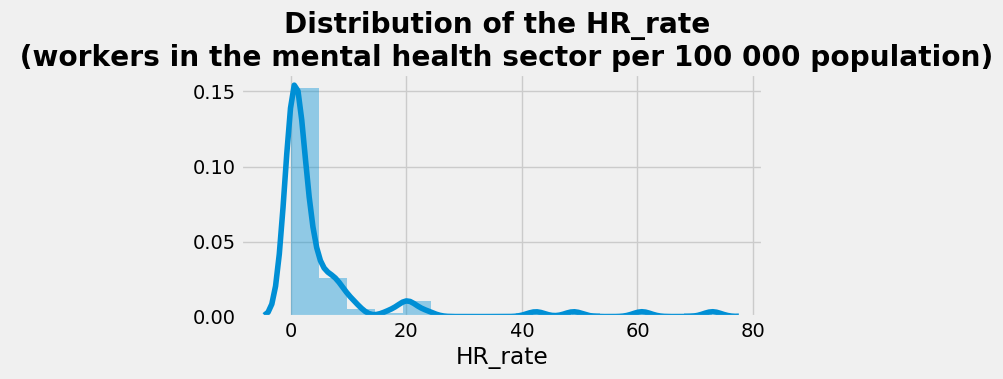

In [253]:
# Creating a distribution plot.
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,3), dpi= 100)
    ax = sns.distplot(HR_2016_data['HR_rate'], bins=15)
    plt.title(label='Distribution of the HR_rate \n (workers in the mental health sector per '
              '100 000 population)', fontweight='bold')
    plt.show()

In [254]:
# Creating variable for age-standarized suicide rates dataframe.
agestd_data = pd.read_csv('agestd.csv', header=0, engine='python')

In [255]:
agestd_data.head()

,Unnamed: 0,Unnamed: 1,Age-standardized suicide rates (per 100 000 population),Age-standardized suicide rates (per 100 000 population).1,Age-standardized suicide rates (per 100 000 population).2,Age-standardized suicide rates (per 100 000 population).3
0,Country,Sex,2016.0,2015.0,2010.0,2000.0
1,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
2,Afghanistan,Male,10.6,10.9,12.5,14.3
3,Afghanistan,Female,2.1,2.1,2.1,1.7
4,Albania,Both sexes,5.6,5.3,7.7,5.8


In [256]:
# Dropping unnecessary columns.
agestd_data = agestd_data.drop(agestd_data.columns[[3, 4, 5]], axis=1)

In [257]:
# Renaming columns.
agestd_data = agestd_data.rename(columns={'Unnamed: 0': 'Country', 'Unnamed: 1': 'Sex', 
                            'Age-standardized suicide rates (per 100 000 population)': 'Suicide_rate'})

In [258]:
agestd_data.head()

,Country,Sex,Suicide_rate
0,Country,Sex,2016.0
1,Afghanistan,Both sexes,6.4
2,Afghanistan,Male,10.6
3,Afghanistan,Female,2.1
4,Albania,Both sexes,5.6


In [259]:
agestd_data = agestd_data.drop([0])

In [260]:
agestd_data.head()

,Country,Sex,Suicide_rate
1,Afghanistan,Both sexes,6.4
2,Afghanistan,Male,10.6
3,Afghanistan,Female,2.1
4,Albania,Both sexes,5.6
5,Albania,Male,7.0


In [261]:
# Filtering data with respect to the constraint.
agestd_data = agestd_data[agestd_data['Sex'] == 'Both sexes']

In [262]:
# Taking a look at distribution parameters.
agestd_data.describe()

,Suicide_rate
count,183.000000
mean,9.682514
std,5.529334
min,0.400000
25%,5.750000
50%,9.100000
75%,12.500000
max,30.200000


In [263]:
# Checking number of nan values in Suicide_rate column.
agestd_data['Suicide_rate'].isna().sum()

0

In [264]:
# Merging both dataframes in order to perform further analysis.
suicide_data = pd.merge(HR_2016_data, agestd_data, on='Country', how='inner').drop(['Sex'], axis=1)

In [265]:
suicide_data.head()

,Country,Year,Psychiatrists,Psychologists,HR_rate,Suicide_rate
0,Afghanistan,2016,0.231,0.296,0.2635,6.4
1,Albania,2016,1.471,1.231,1.3510,5.6
2,Angola,2016,0.057,0.179,0.1180,8.9
3,Armenia,2016,3.840,0.788,2.3140,5.7
4,Azerbaijan,2016,3.452,1.165,2.3085,2.6


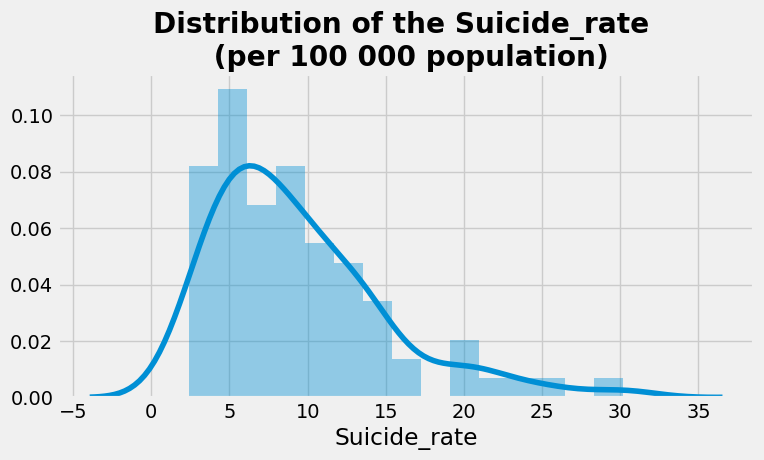

In [266]:
# Creating a distribution plot.
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,4), dpi= 100)
    ax = sns.distplot(suicide_data['Suicide_rate'], bins=15)
    plt.title(label='Distribution of the Suicide_rate \n (per 100 000 population)', fontweight='bold')
    plt.show()

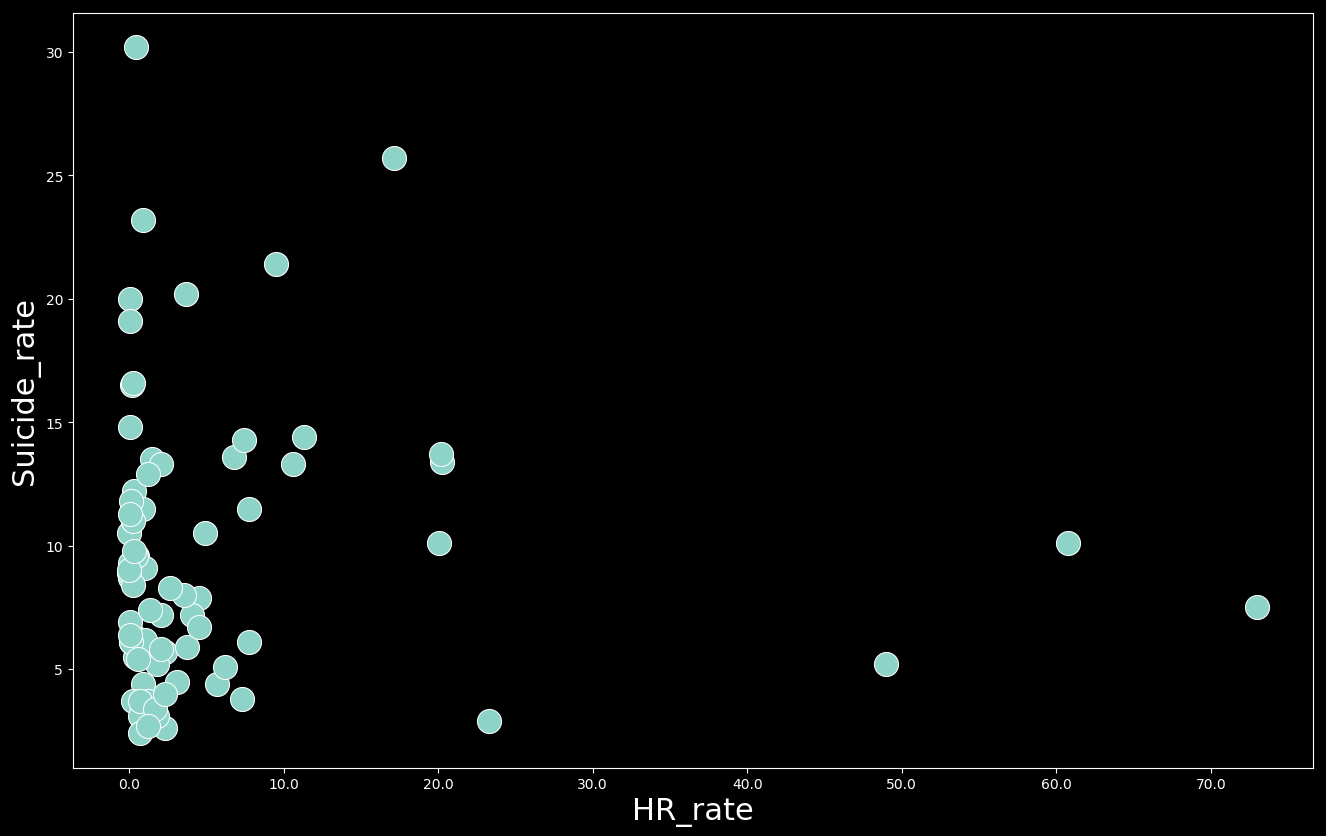

In [267]:
# Creating a scatterplot.
import matplotlib.ticker as ticker
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    sns.scatterplot(suicide_data['HR_rate'], suicide_data['Suicide_rate'], s=300, ax=ax)
    ax.xaxis.set_ticks(np.arange(0, 80, 10))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    ax.set_xlabel('HR_rate', fontsize='22')
    ax.set_ylabel('Suicide_rate', fontsize='22')

In [268]:
# Calculating Pearson's r and related p-value.
r_pearson, p_value  = stats.pearsonr(suicide_data['HR_rate'], suicide_data['Suicide_rate'])

In [269]:
r_pearson

0.012468709117867101

In [270]:
p_value

0.913153256837461

In [271]:
# Assigning sample size to a variable.
N = suicide_data['Suicide_rate'].count()

In [272]:
N

79

In [273]:
def r_to_z(r):
    '''Converting r value to z value - Fisher's transformation'''
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    '''Converting back z value to r value'''
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    '''Calculating Pearson's r confidence interval for the two-tailed test'''
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    low_interval = z - z_crit * se
    high_interval = z + z_crit * se

    return (z_to_r(low_interval), z_to_r(high_interval))

In [274]:
# Assigning 95% confidence interval to a variable.
CI_95 = r_confidence_interval(r_pearson, 0.05, N)

In [275]:
CI_95

(-0.2092185000091518, 0.23293691289033713)

## Results

**Pearson's r** = *0.012468709117867101*
**p-value** = *0.913153256837461*
**95% confidence interval** = *(-0.2092185000091518, 0.23293691289033713)*

## Conclusions

Based on the Pearson's r with respect to p-value and taking into account the sampling error we retain the null hypothesis. 

There is no statistically significant correlation between suicide rate across the world and a number of psychiatrists and psychologists working in the mental health sector.

As an alternative solution, I would recommend applying similar analysis on the data including counseling rate with additional constraints like a number of sessions/overall length of a therapy per patient. I can only speculate that this would have a higher chance of showing a significant correlation than simply the number of workers in the mental health sector, although acquiring this type of data may not be accessible.